In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import matplotlib.patches as mpatches


cities = pd.read_csv("../data/cities.csv")
cities.rename(columns = {'id': "city_id"}, inplace=True)
cities.sample(10)

,city_id,name,coords,start_year,url_name,country,country_state
64,48,Glasgow,POINT(-4.25 55.83333333),1891.0,glasgow,Scotland,NaN
224,168,Grand Rapids,POINT(-85.66666667 42.96666667),2017.0,grand-rapids,United States,Mich.
317,258,Bilbao,POINT(-2.953333 43.262222),1887.0,bilbao,Spain,NaN
151,99,Prague,POINT(14.43333333 50.08333333),2017.0,prague,Czech Republic,NaN
119,324,Nice,POINT(7.265023965 43.71501772),2002.0,nice,France,NaN
173,113,Teheran,POINT(51.75 35.75),2017.0,teheran,Iran,NaN
35,31,Calcutta,POINT(88.4 22.56666667),2017.0,calcutta,India,NaN
152,100,Rangoon,POINT(96 16.83333333),2017.0,rangoon,Myanmar,NaN
201,136,Birmingham,POINT(-86.83333333 33.5),2017.0,birmingham-united-states,United States,Ala.
262,209,Oklahoma City,POINT(-97.46666667 35.43333333),2017.0,oklahoma-city,United States,Okla.


In [2]:
lines = pd.read_csv("../data/lines.csv")
lines.sample(16)

,id,city_id,name,url_name,color,system_id,transport_mode_id
26,158,4,FFCC de Circunvalación,158-ffcc-de-circunvalacion,#000,276,2.0
199,375,95,T 7,375-t-7,#885f30,296,5.0
89,99,71,5,99-5,#7ed321,246,NaN
67,175,15,Line 4,175-line-4,#008193,258,NaN
1196,1311,206,Far Rockaway Branch,1311-far-rockaway-branch,#6e3219,495,3.0
1215,1305,206,42nd Street Shuttle,1305-42nd-street-shuttle,#808183,191,4.0
1261,1357,261,Paicaví,1357-paicavi,#b8e986,501,6.0
1273,1368,91,Ikoma Line,1368-ikoma-line,#c22047,374,4.0
1130,1256,256,7,1256-7,#fa7e2b,488,4.0
904,1020,108,East West Line,1020-east-west-line,#009530,95,4.0


In [3]:
station_lines = pd.read_csv('../data/station_lines.csv')
station_lines.sample(16)

,id,station_id,line_id,city_id,created_at,updated_at
4429,4540,1270,142,69,2017-11-21 00:00:00,2017-11-21 00:00:00
13285,16077,15762,1452,91,2018-11-22 22:38:12.632587,2018-11-22 22:38:12.632587
9202,10474,10691,968,286,2018-02-18 17:17:38.810882,2018-02-18 17:17:38.810882
13926,6767,3279,81,78,2017-11-21 00:00:00,2017-11-21 00:00:00
477,538,7842,631,99,2017-11-21 00:00:00,2017-11-21 00:00:00
4657,4768,2160,208,69,2017-11-21 00:00:00,2017-11-21 00:00:00
6535,15899,15589,1449,91,2018-11-11 21:04:28.585957,2018-11-11 21:04:28.585957
2408,2509,8302,674,114,2017-11-21 00:00:00,2017-11-21 00:00:00
7988,10856,11002,1018,111,2018-03-12 23:45:50.970999,2018-03-12 23:45:50.970999
11423,13073,13015,1233,206,2018-09-20 21:08:01.517184,2018-09-20 21:08:01.517184


In [4]:
stations = pd.read_csv('../data/stations.csv')
stations[stations['name'] == "Pico"]

,id,name,geometry,buildstart,opening,closure,city_id
476,8567,Pico,POINT(-118.2662644 34.0406307),0.0,0.0,999999.0,189
870,8568,Pico,POINT(-118.2660609 34.0407563),0.0,0.0,999999.0,189
12246,12132,Pico,POINT(-58.4741980951992 -34.5410318797355),2014.0,2015.0,999999.0,1


In [5]:
systems = pd.read_csv('../data/stations.csv')
systems

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [6]:
track_lines = pd.read_csv('../data/track_lines.csv')
track_lines

,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48
...,...,...,...,...,...,...
9752,10699,10530,1611,2019-03-06 22:23:46.008756,2019-03-06 22:23:46.008756,91
9753,10700,10531,1611,2019-03-06 22:27:46.532431,2019-03-06 22:27:46.532431,91
9754,10701,10532,1611,2019-03-06 22:30:58.779519,2019-03-06 22:30:58.779519,91
9755,10702,10533,1610,2019-03-08 21:57:21.68915,2019-03-08 21:57:21.68915,91


In [7]:
tracks = pd.read_csv('../data/tracks.csv')
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


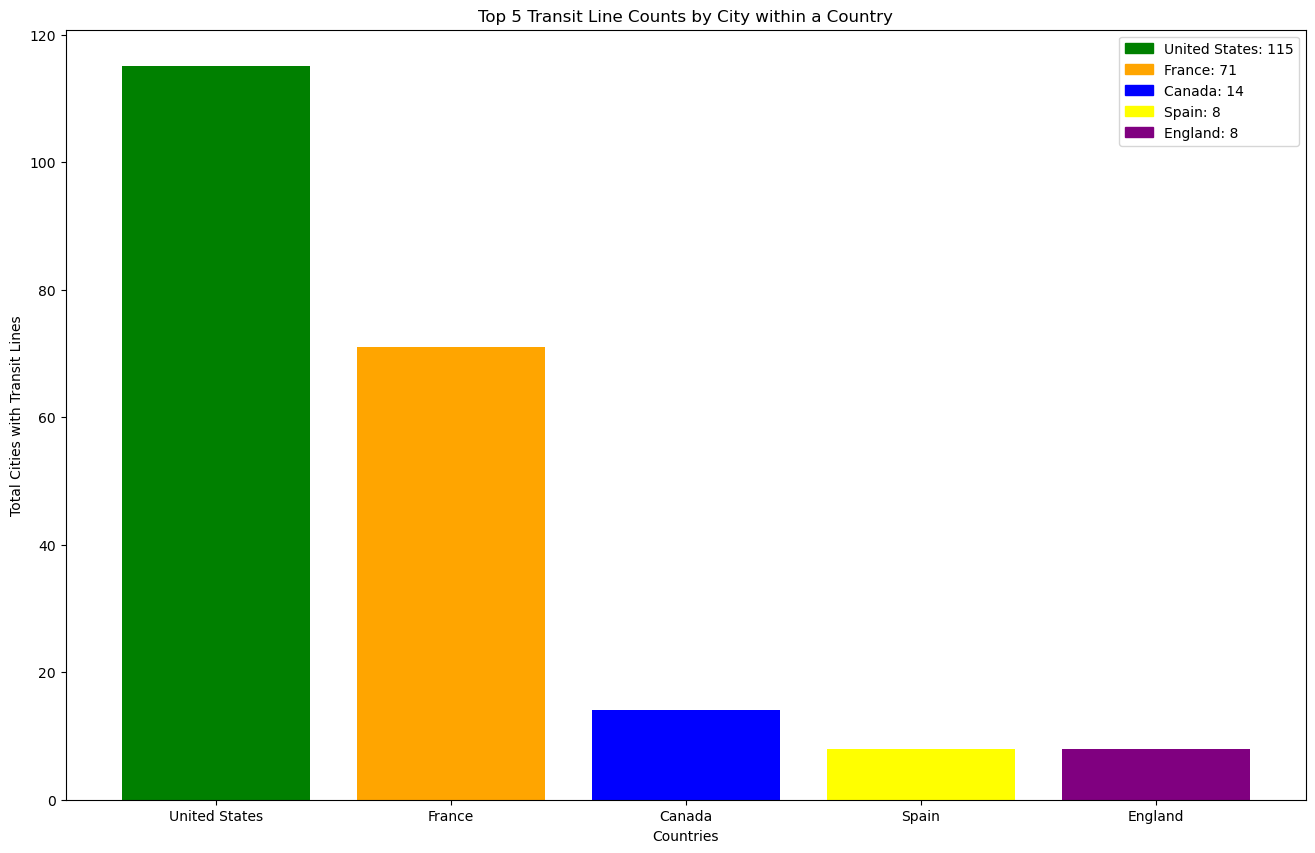

In [8]:
ranked_countries = cities["country"].value_counts().sort_values(ascending=False)

top_five_countries = ranked_countries[0:5]

fig, ax = plt.subplots()

ax.bar(top_five_countries.index, top_five_countries.values)

c = ['green', 'orange', 'blue', 'yellow', 'purple',]
ax.bar(top_five_countries.index, top_five_countries.values, color = c)

ax.set_title("Top 5 Transit Line Counts by City within a Country")
ax.set_ylabel("Total Cities with Transit Lines")
ax.set_xlabel("Countries")
united_states_legend = mpatches.Patch(color= 'green', label='United States: 115')
france_legend = mpatches.Patch(color= 'orange', label='France: 71')
canada_legend = mpatches.Patch(color= 'blue', label='Canada: 14')
spain_legend = mpatches.Patch(color= 'yellow', label='Spain: 8')
england_legend = mpatches.Patch(color= 'purple', label='England: 8')
plt.legend(handles=[united_states_legend, france_legend, canada_legend, spain_legend, england_legend])
fig.set_size_inches(16, 10)

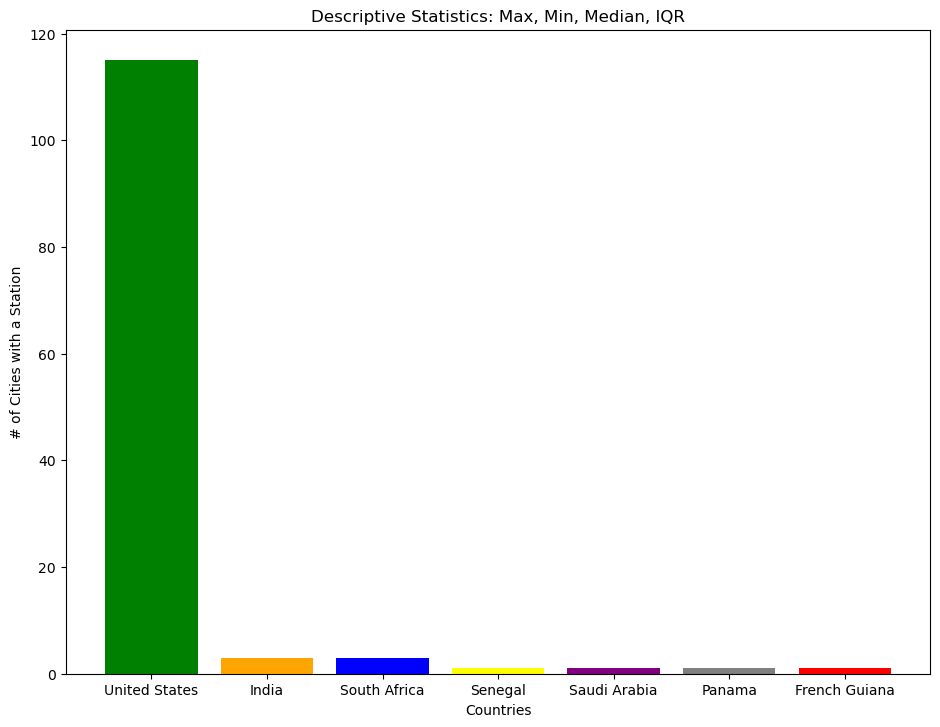

In [9]:


top_country = ranked_countries.max()
top_country_name = ranked_countries.idxmax()

bottom_country = ranked_countries.min()
bottom_country_name = ranked_countries.idxmin()

median_country = ranked_countries.median()
median_country_name = ranked_countries.index[int((len(ranked_countries) -1 ) / 2)]

q3a_country = ranked_countries.iloc[17]
q3a_country_name = ranked_countries.index[17]

q3b_country = ranked_countries.iloc[18]
q3b_country_name = ranked_countries.index[18]


q1a_country = ranked_countries.iloc[-18]
q1a_country_name = ranked_countries.index[-18]

q1b_country = ranked_countries.iloc[-19]
q1b_country_name = ranked_countries.index[-19]

countries = [
    top_country_name, q3a_country_name, 
    q3b_country_name, median_country_name, 
    q1a_country_name, q1b_country_name,
    bottom_country_name]

values = [
    top_country, q3a_country,
    q3b_country, median_country,
    q1a_country, q1b_country,
    bottom_country
]

fig, ax = plt.subplots()
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(countries, values, color = c)
ax.set_title("Descriptive Statistics: Max, Min, Median, IQR")
ax.set_ylabel("# of Cities with a Station")
ax.set_xlabel("Countries")
fig.tight_layout()
fig.set_size_inches(10,8)




In [10]:
united_states = cities[cities["country"] == "United States"]

united_states

,city_id,name,coords,start_year,url_name,country,country_state
14,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
163,155,Detroit,POINT(-83.05 42.33333333),2017.0,detroit,United States,Mich.
164,170,Helena,POINT(-112.0333333 46.58333333),2017.0,helena,United States,Mont.
165,214,Pierre,POINT(-100.35 44.36666667),2017.0,pierre,United States,S.D.
180,138,Boise,POINT(-116.2166667 43.6),2017.0,boise,United States,Idaho
...,...,...,...,...,...,...,...
300,248,Tulsa,POINT(-95.98333333 36.15),2017.0,tulsa,United States,Okla.
303,251,Virginia Beach,POINT(-75.96666667 36.85),2017.0,virginia-beach,United States,Va.
305,253,Wichita,POINT(-97.28333333 37.71666667),2017.0,wichita,United States,Kan.
306,254,Wilmington,POINT(-77.95 34.23333333),2017.0,wilmington,United States,N.C.


In [11]:
merged_cities_stations = pd.merge(stations, cities, on='city_id', how='left')
merged_cities_stations_us = merged_cities_stations[merged_cities_stations['country'] == 'United States']
merged_cities_stations_us.sample(10)

,id,name_x,geometry,buildstart,opening,closure,city_id,name_y,coords,start_year,url_name,country,country_state
11353,13064,Morrisania,POINT(-73.9082275351144 40.8318432940236),1858.0,1858.0,1973.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
14184,14710,Brookline Hills,POINT(-71.1260469997671 42.3311686296562),1852.0,1852.0,1958.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.
8053,3906,Minnesota Ave,POINT(-76.9468841712382 38.8991298135707),0.0,1978.0,999999.0,252,Washington,POINT(-77.03333333 38.88333333),1969.0,washington,United States,D.C.
4534,13539,58th Street,POINT(-74.0191644611079 40.6430505935925),1893.0,1893.0,1940.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
14026,14525,Bloomfield Avenue,POINT(-74.1798141985864 40.7653200332497),1935.0,1935.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
8753,9148,63rd,POINT(-87.6309446 41.7807828),0.0,0.0,999999.0,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
718,6365,Schiller,POINT(-87.6372069102066 41.9076431783881),0.0,1900.0,1949.0,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
14355,14946,Ashmont,POINT(-71.0636136531814 42.2839910327832),1928.0,1928.0,999999.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.
13722,14201,Elmhurst Avenue,POINT(-73.8810461280864 40.7417878983976),1936.0,1936.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
11215,13026,Morrison Avenue-Soundview,POINT(-73.8746121458851 40.8295140255952),1920.0,1920.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.


<BarContainer object of 7 artists>

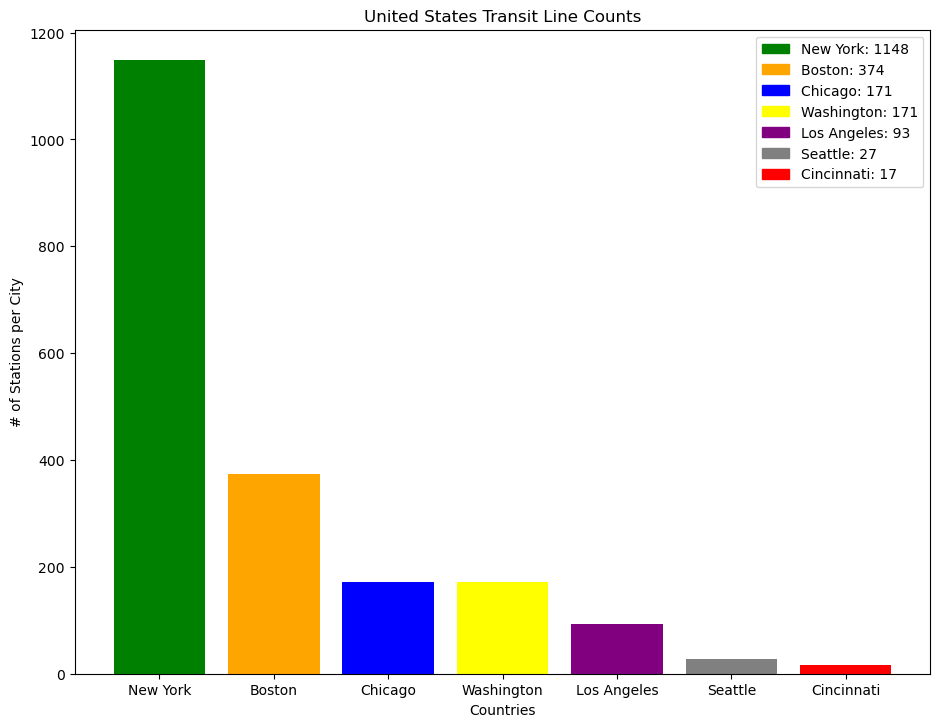

In [12]:
merged_stations_us_by_state = merged_cities_stations_us.value_counts('name_y')
merged_stations_us_by_state

fig, ax = plt.subplots()
ax.set_title("United States Transit Line Counts")
ax.set_ylabel("# of Stations per City")
ax.set_xlabel("Countries")
new_york_legend = mpatches.Patch(color= 'green', label='New York: 1148')
boston_legend = mpatches.Patch(color= 'orange', label='Boston: 374')
chicago_legend = mpatches.Patch(color= 'blue', label='Chicago: 171')
washington_legend = mpatches.Patch(color= 'yellow', label='Washington: 171')
los_angeles_legend = mpatches.Patch(color= 'purple', label='Los Angeles: 93')
seattle_legend = mpatches.Patch(color= 'grey', label='Seattle: 27')
cincinnati_legend = mpatches.Patch(color= 'red', label='Cincinnati: 17')
plt.legend(handles=[new_york_legend, boston_legend, chicago_legend, washington_legend, los_angeles_legend, seattle_legend, cincinnati_legend ])
#ax.legend(["1148", "374", "171", "171", "93", "27", "17"])
fig.tight_layout()
fig.set_size_inches(10,8)
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(merged_stations_us_by_state.index, merged_stations_us_by_state.values, color = c)

In [13]:
stations

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


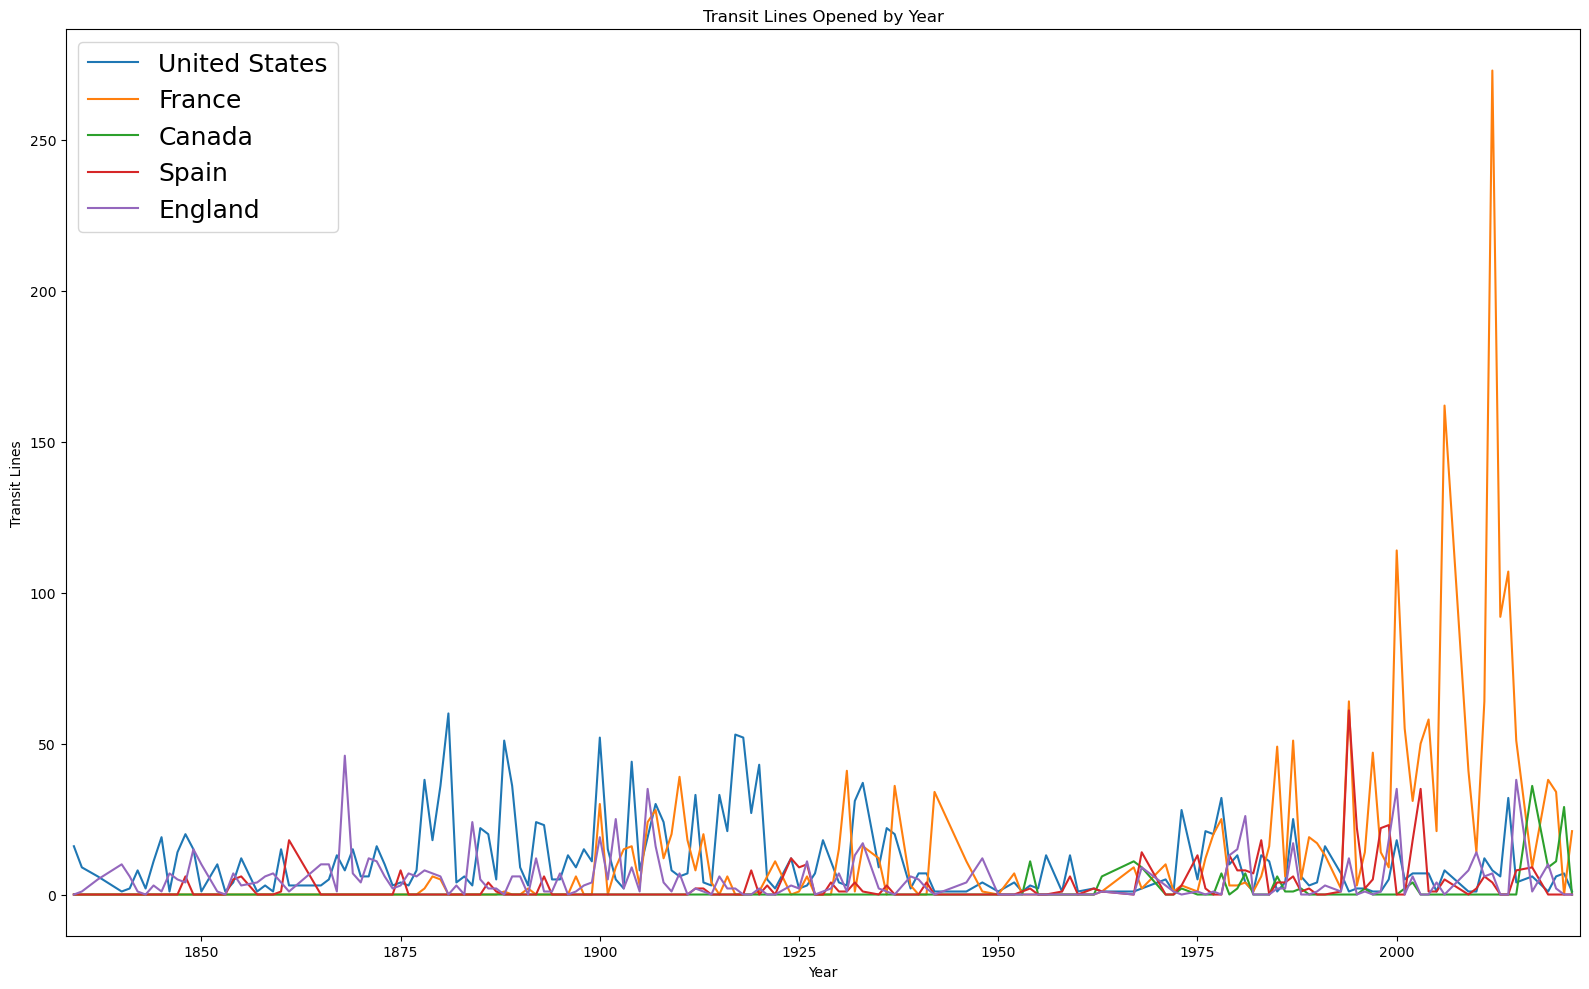

In [14]:
merged_cities_stations.sample(10)

def openings_years_per_country(df, country1, country2, country3, country4, country5):
    openings_per_country_df = pd.DataFrame()
    openings_per_country_df[country1] = df[(df['country'] == country1) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country2] = df[(df['country'] == country2) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country3] = df[(df['country'] == country3) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country4] = df[(df['country'] == country4) & (df['opening'] > 0)].value_counts('opening')
    openings_per_country_df[country5] = df[(df['country'] == country5) & (df['opening'] > 0)].value_counts('opening')

    openings_per_country_df[[country1, country2, country3, country4, country5]] = \
        openings_per_country_df[[country1, country2, country3, country4, country5]].fillna(0)

    return openings_per_country_df.sort_index()


openings_per_country_df = openings_years_per_country(merged_cities_stations, 'United States', "France", 'Canada', 'Spain', 'England')

fig, ax = plt.subplots()

ax.plot(openings_per_country_df)
ax.set_xlim(1833, 2023)
ax.set_title("Transit Lines Opened by Year")
ax.set_ylabel("Transit Lines")
ax.set_xlabel("Year")
ax.legend(openings_per_country_df, prop={'size': 18})
fig.set_size_inches(16, 10)
fig.tight_layout()



In [15]:
us_station_map = merged_cities_stations_us[['name_x', 'geometry', 'name_y']]
us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
us_station_map['long'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[0])
us_station_map



/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_9192/33158620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_9192/33158620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_9192/33158620.py:4: SettingWithCopyWarning: 
A value is tryi

,station,geometry,city,lat,long
351,Sands Street,POINT(-73.9900595885681 40.6999957881726),New York,40.6999957881726,-73.9900595885681
460,Sands Street,POINT(-73.9909195185139 40.7000028855033),New York,40.7000028855033,-73.9909195185139
461,7th Street/Metro Center,POINT(-118.2586637 34.0486686),Los Angeles,34.0486686,-118.2586637
476,Pico,POINT(-118.2662644 34.0406307),Los Angeles,34.0406307,-118.2662644
524,Franklin Avenue,POINT(-73.9558290151206 40.6809373893361),New York,40.6809373893361,-73.9558290151206
...,...,...,...,...,...
15448,West Edge,POINT(-122.336763227539 47.6058839076996),Seattle,47.6058839076996,-122.336763227539
15449,South Lake Union-Seattle Center,POINT(-122.343234884068 47.6203175414603),Seattle,47.6203175414603,-122.343234884068
15503,Friendship Heights,POINT(-77.0854410365934 38.9615399698817),Washington,38.9615399698817,-77.0854410365934
15504,Wisconsin Ave @ Jenifer,POINT(-77.0848162794167 38.9591131645103),Washington,38.9591131645103,-77.0848162794167


In [16]:


map_us=folium.Map()

us_stations=pd.DataFrame({"lat":us_station_map['lat'],"long":us_station_map['long']})

map_us.add_child(plugins.HeatMap(data=us_stations))

map_us

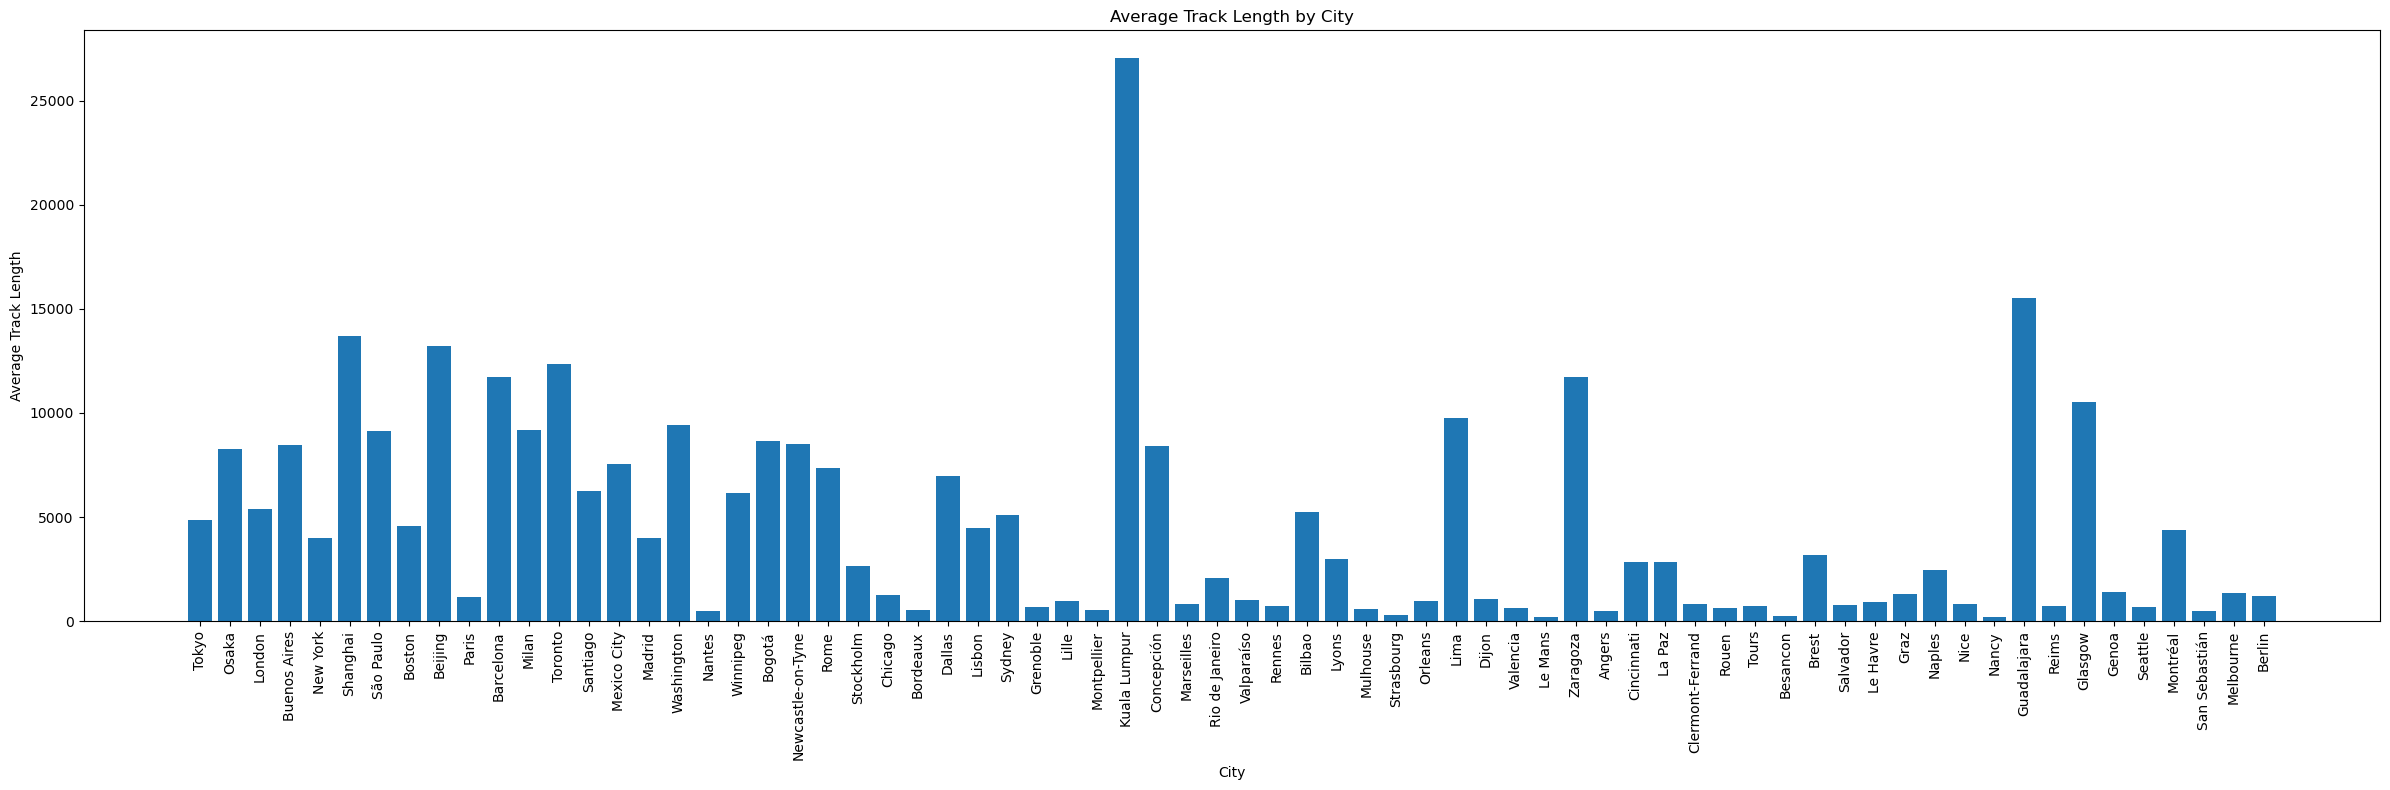

In [35]:
tracks_tracklines_merged = pd.merge(tracks, track_lines, on='id', how='left')
# tracks_tracklines_merged.sort_values('id', ascending=True)
tracks_tracklines_merged = tracks_tracklines_merged[(tracks_tracklines_merged['opening'] > 0) & \
                                                    (tracks_tracklines_merged['length'] > 0)]
# tracks_tracklines_merged

tracks_groupby_city = tracks_tracklines_merged.groupby('city_id_x').mean()
tracks_tracklines_merged.rename(columns= {'city_id_x':'city_id'}, inplace=True)
tracks_tracklines_merged.drop(['buildstart', 'city_id_y'], axis=1, inplace=True)
tracks_tracklines_merged

tracks_cities_merged = pd.merge(tracks_tracklines_merged, cities, on='city_id', how='left')
tracks_cities_merged = tracks_cities_merged[['id', 'geometry', 'opening', 'length', 'city_id', 'name', 'coords']]
tracks_cities_merged.rename(columns= {'name':'city'}, inplace=True)
num_tracks_per_city_series = tracks_cities_merged.value_counts('city')
# num_tracks_per_city_series
city_track_data = tracks_cities_merged.groupby('city').sum().sort_values('length', ascending=False)
city_track_data['#_of_tracks'] = num_tracks_per_city_series
city_track_data

fig, ax = plt.subplots()

ax.bar(city_track_data.index,(city_track_data['length'] / city_track_data['#_of_tracks']))
ax.set_xlabel('City')
ax.set_ylabel('Average Track Length')
ax.set_title('Average Track Length by City')
ax.tick_params(axis='x', labelrotation = 90)
fig.set_size_inches(24,8)
fig.tight_layout()

/var/folders/w9/0y2smhf95qd_4dp0mg3n1vbh0000gn/T/ipykernel_5932/463383366.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['0','200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000'])


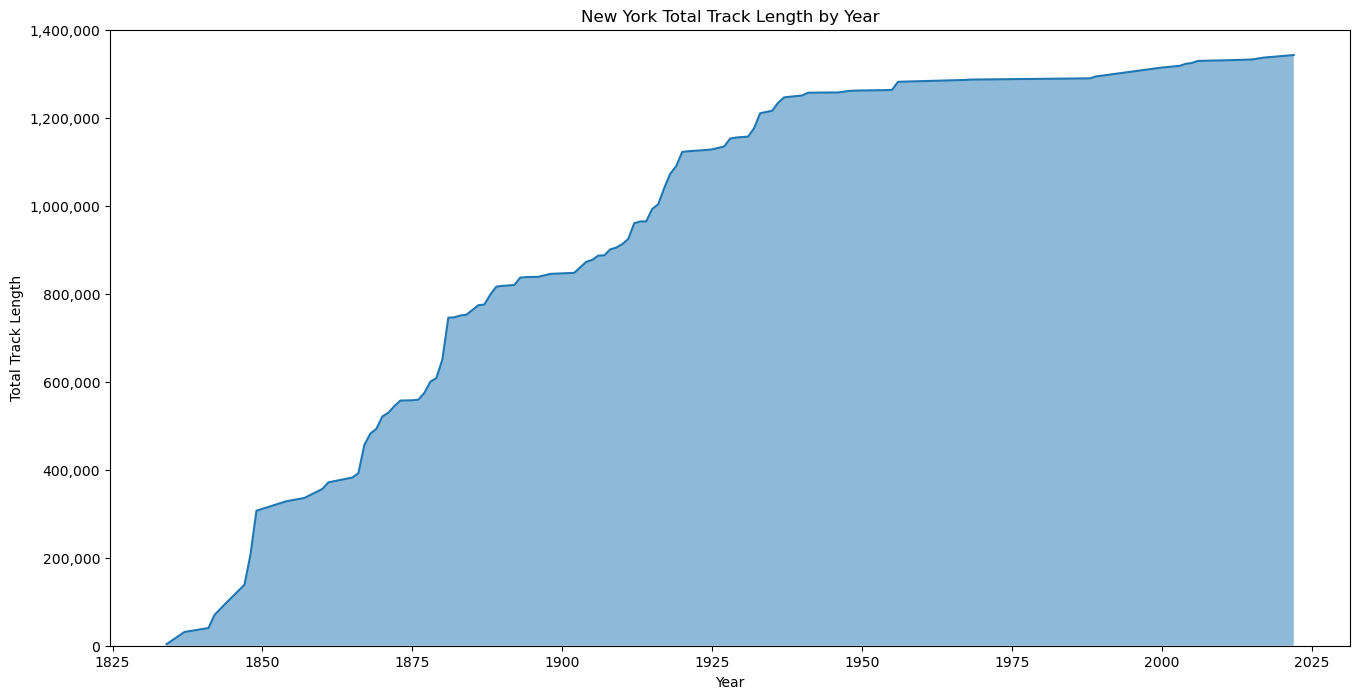

In [152]:
tracks_cities_merged2 = tracks_cities_merged
ny_tracks = tracks_cities_merged2[tracks_cities_merged2['city'] == "New York"]
# ny_tracks.sample(40)
ny_tracks_grouped_opening = ny_tracks.groupby('opening').sum()
ny_tracks_grouped_opening.drop('city_id', axis=1, inplace=True)
ny_tracks_grouped_opening_sorted = ny_tracks_grouped_opening.sort_index()

total_track_length = 0
total_track_lst = []

for i in range(len(ny_tracks_grouped_opening_sorted.index)):
    total_track_length += ny_tracks_grouped_opening_sorted.iloc[i, 1]
    total_track_lst.append(total_track_length)
ny_tracks_grouped_opening_sorted["total_track_length"] = total_track_lst
ny_tracks_grouped_opening_sorted

fig, ax = plt.subplots()

ax.plot(ny_tracks_grouped_opening_sorted.index, ny_tracks_grouped_opening_sorted['total_track_length'])
ax.fill_between(ny_tracks_grouped_opening_sorted.index, ny_tracks_grouped_opening_sorted['total_track_length'], alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel("Total Track Length")
ax.set_title('New York Total Track Length by Year')
ax.set_ylim(0, 1400000)
ax.set_yticklabels(['0','200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000', '1,400,000'])
fig.set_size_inches(16,8)